# Let's work on a `Telco Customer Churn` prediction

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt

### Load the dataset

In [2]:
df = pd.read_csv("../dataset/Customer-churn-datase.csv")

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data understanding 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

[5174 1869]


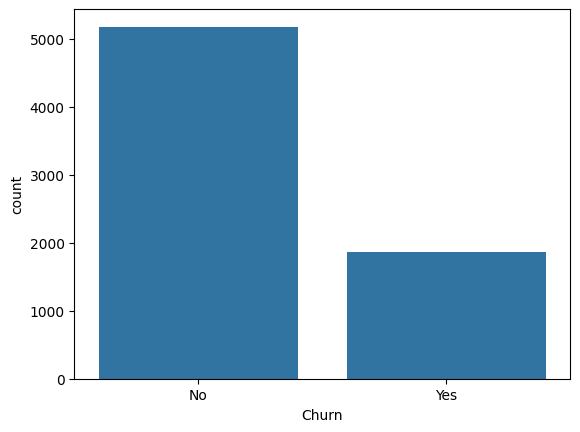

In [6]:
print(df.Churn.value_counts().values)
sns.countplot(data=df, x='Churn');

Check for duplicates

In [7]:
df.duplicated(keep='first').sum()

np.int64(0)

Check for outliers

In [8]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

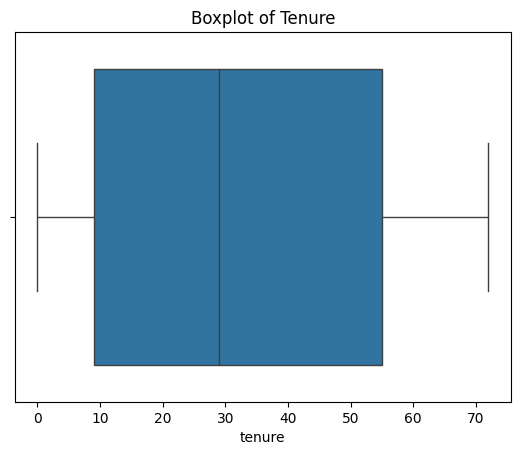

In [9]:
# Tenure
sns.boxplot(x=df['tenure'])
plt.title("Boxplot of Tenure")
plt.show()

In [10]:
df.MonthlyCharges.unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ], shape=(1585,))

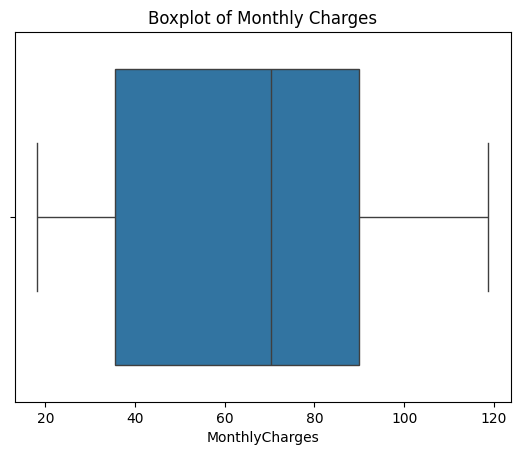

In [11]:
# MonthlyCharges
sns.boxplot(x=df['MonthlyCharges'])
plt.title("Boxplot of Monthly Charges")
plt.show()

In [12]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

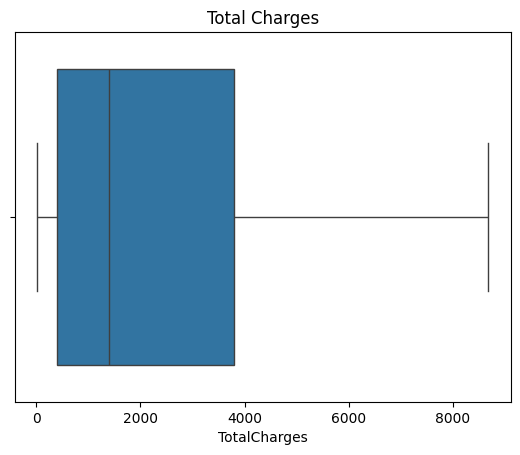

In [13]:
# TotalCharges
sns.boxplot(x=pd.to_numeric(df['TotalCharges'], errors='coerce'))
plt.title("Total Charges")
plt.show()

## Feature Engineering

In [14]:
# conver TotalCharges to int

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

Check if the converstion introduced missing values

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Drop the missing values

In [16]:
df = df.drop_duplicates(keep="first")

Drop customer id column

In [17]:
df = df.drop(columns="customerID", axis=1)

Drop nan

In [18]:
df = df.dropna(axis=0)

## Encoding 

In [19]:
# Colunms with yes or no values
ordinal_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

In [20]:
for col in ordinal_cols:
     df[col] = df[col].map({"Yes": 1, "No": 0})

In [21]:
# Nominal encoder
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [22]:
contract_ord = {'Month-to-month':0, 'One year':1, 'Two year':2}
df.Contract = df.Contract.map(contract_ord)

In [23]:
group_ord = {'No':0, 'Yes':1, 'No internet service':3}
group_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in group_cols:
     df[col] = df[col].map(group_ord)

In [24]:
# Gender trx
df.gender = df.gender.map({"Male": 1, "Female": 0})

In [25]:
internet_ord = {'DSL':0, 'Fiber optic':1, 'No':3}
df.InternetService = df.InternetService.map(internet_ord)

In [26]:
multiplelines_ord = {'No':0, 'Yes':1, 'No phone service':3}
df.MultipleLines = df.MultipleLines.map(multiplelines_ord)

In [27]:
payment_ord = {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':3, "Credit card (automatic)":4}
df.PaymentMethod = df.PaymentMethod.map(payment_ord)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,3,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,3,0,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


[5163 1869]


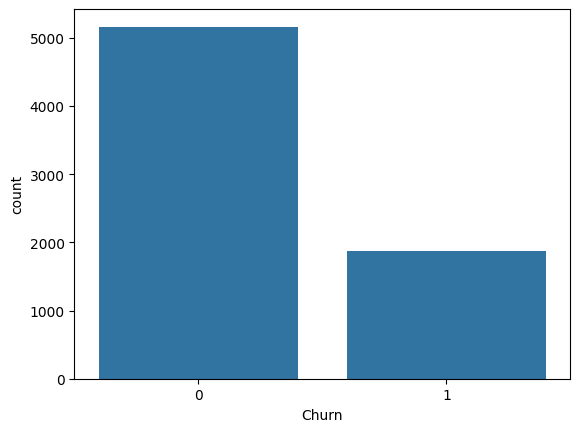

In [29]:
print(df.Churn.value_counts().values)
sns.countplot(data=df, x='Churn');

### Let's handle data imbalance

In [30]:
# Separate majority and minority classes
df_majority = df[df.Churn == 0]
df_minority = df[df.Churn == 1]

# Oversample minority class
df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=42)

# Combine back
df_resampled = pd.concat([df_majority, df_minority_oversampled])

# Shuffle
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_resampled['Churn'].value_counts())

Churn
0    5163
1    5163
Name: count, dtype: int64


### split feature from target

In [31]:
X = df_resampled.drop(columns="Churn", axis=1)
X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,6,1,0,3,3,3,3,3,3,3,0,0,1,20.65,109.3
1,1,0,0,0,57,1,1,1,0,0,0,1,1,0,2,1,4,90.45,5229.8
2,1,0,1,0,38,0,3,0,1,1,0,1,1,1,2,1,3,60.00,2193.2
3,0,0,0,0,57,1,1,1,1,1,1,0,1,1,2,1,3,112.95,6465.0
4,0,0,1,0,68,1,1,0,1,0,0,1,0,0,1,0,3,58.25,3975.7


In [32]:
y = df_resampled[["Churn"]]
y.head(5)

,Churn
0,0
1,0
2,0
3,1
4,0


### Train test split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(8260, 2066)

### Scale

In [47]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure directory exists
save_dir = "../src/data/scaler.save"
joblib.dump(scaler, save_dir)

['../src/data/scaler.save']

In [43]:
# Save scaled arrays
np.save("../src/data/X_train_scaled.npy", X_train_scaled)
np.save("../src/data/X_test_scaled.npy", X_test_scaled)
np.save("../src/data/y_train.npy", y_train)
np.save("../src/data/y_test.npy", y_test)